# What is Parkinson's Disease?
Parkinson's Disease is a neurodegenerative disorder that affects dopamine-producing neurons in the brain. It has 5 stages to it, and is a progessive disorder of the central nervous system affecting movement and inducing tremors and stiffness.

# **![](http://)Install the XGBoost to use the XGB Classifier**
XGBoost is a Machine Learning algorithm

In [175]:
pip install numpy pandas sklearn xgboost

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


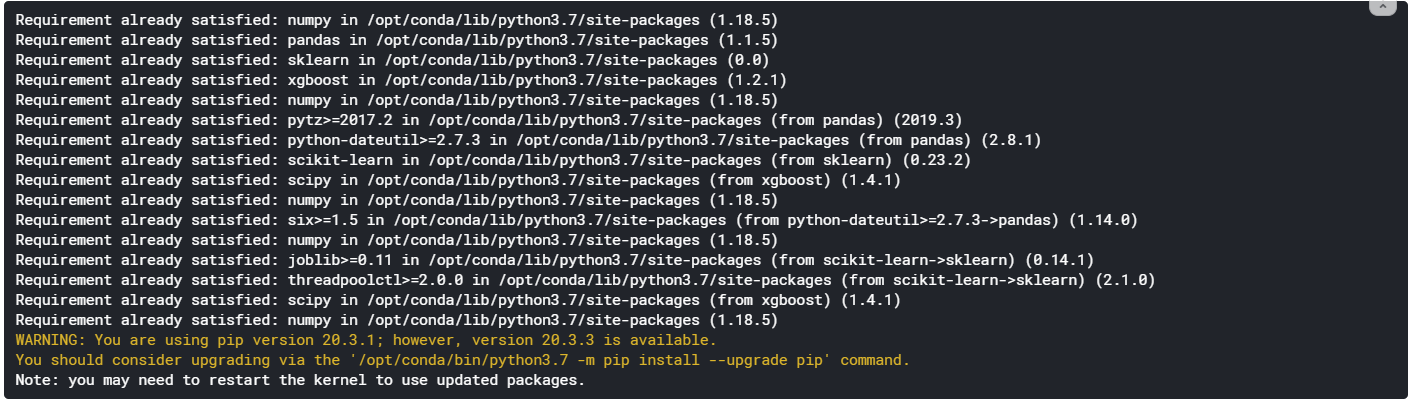

In [176]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split

Important Imports

In [177]:
import numpy as np #linear alg
import pandas as pd #data processing
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

seed to reproduce same results

In [178]:
seed = 9
np.random.seed(seed)

read the Datafile as df and show the first 5 rows

In [179]:
df = pd.read_csv("../input/parkinsons/parkinsons.txt")
#get a copy to avoid changing the original data
data = df.copy()
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


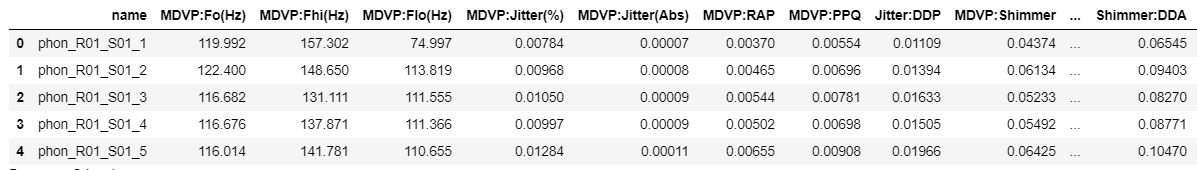

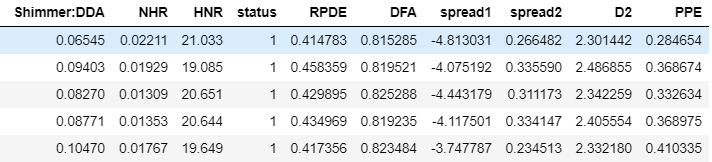

In [180]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


when reading the first and last 5 outputs, looking at the status columns, it gives an output of 1 and 0s. This will be taken into consideration when splitting the data.

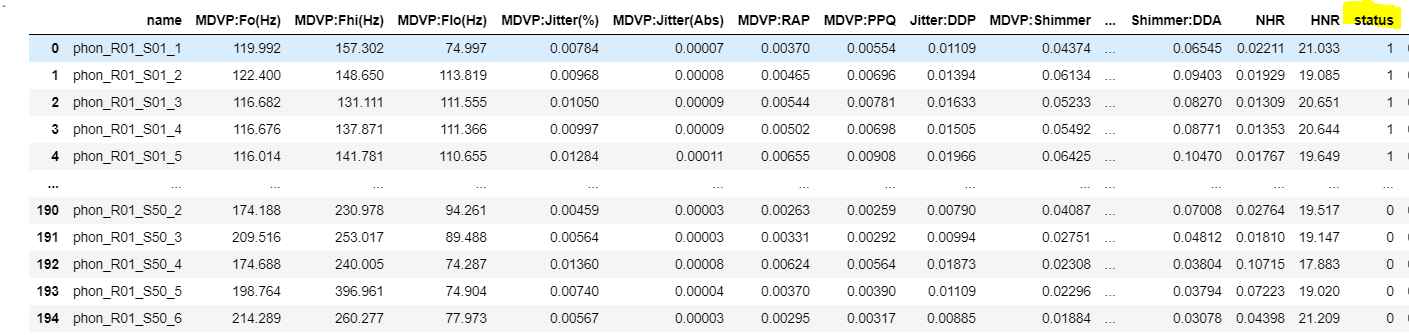

Read every column except status since this might interfere with the accuracy
Use it later on

In [181]:
#locate every column except 'status'
#using = df.loc[:,df.columns != ('status', 'name')].values[:,1:]
#labels = df.loc[:,'status'].values

In [182]:
using = data.drop(['name'], axis = 1)

using = using.drop(['status'], axis = 1)
X = using
Y = data['status']

Here, use labels ('status') to do the testing. This will tell you if the person we're testing has parkinson's dieases or not. We use this column for testing since in the dataset, 'status' already tells us if the person has the disease or not

scale to normalize

In [183]:
#DataFlair - Scale the features to between -1 and 1
#scaler = MinMaxScaler((-1,1))
#X = using
#y = labels

Keep 20% of the data for validation testing purposes

In [195]:
#split the data set into 8:2 ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 7)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_val)

Here we will train the model using the training data (x_train and y_train) 
fitting the model with the 2 informations will train the model 

In [185]:
#df.hist(figsize=(28,28))

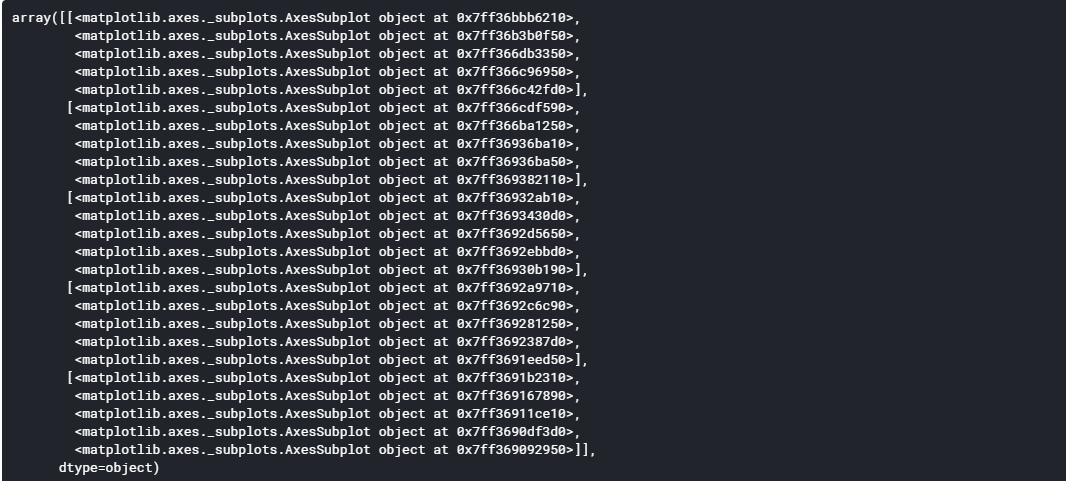

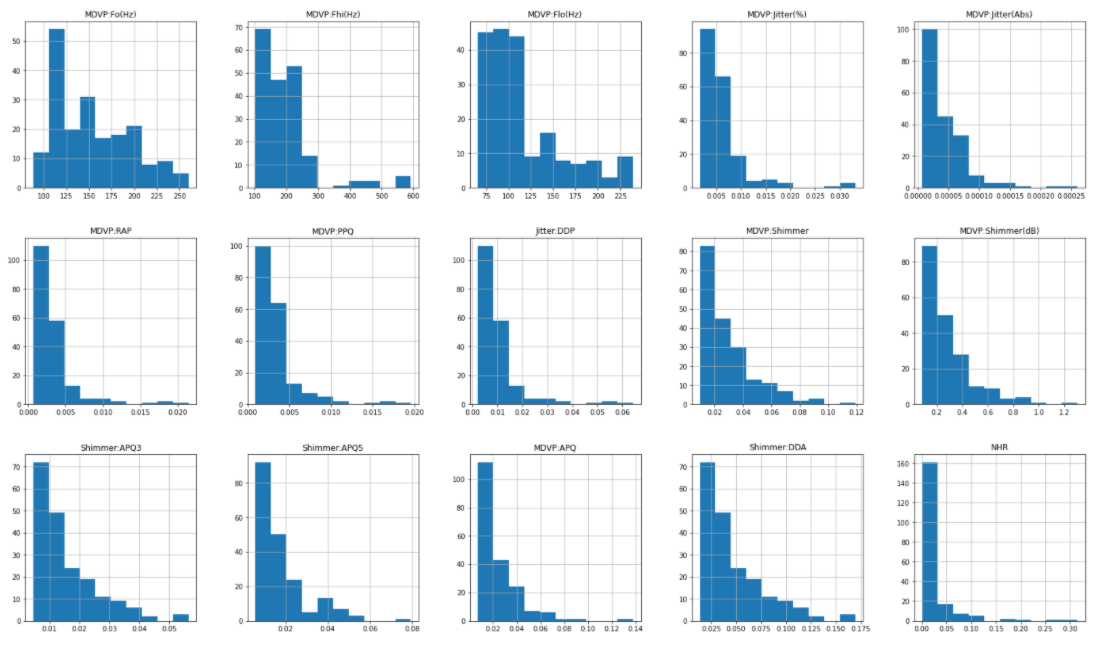

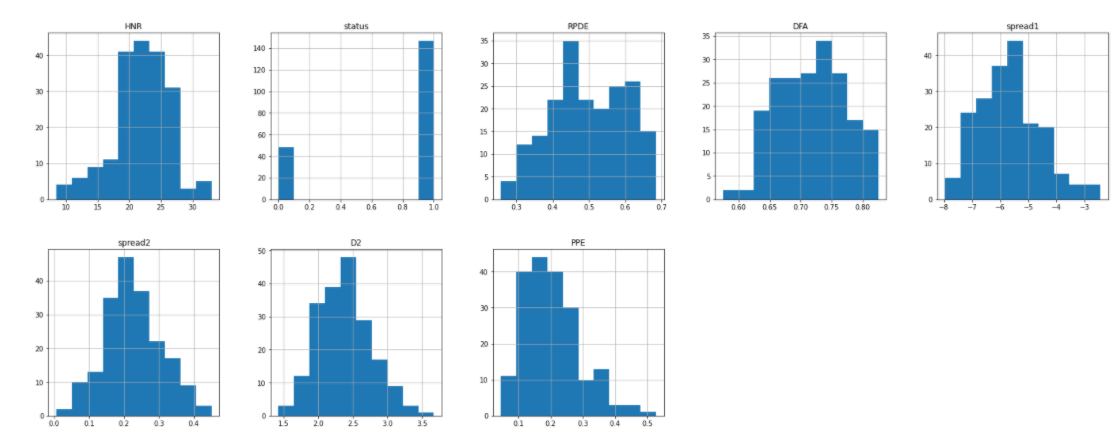

In [186]:
#plt.figure(figsize=(20,15))
#sns.heatmap(df.corr() ,annot=True)
#plt.show()

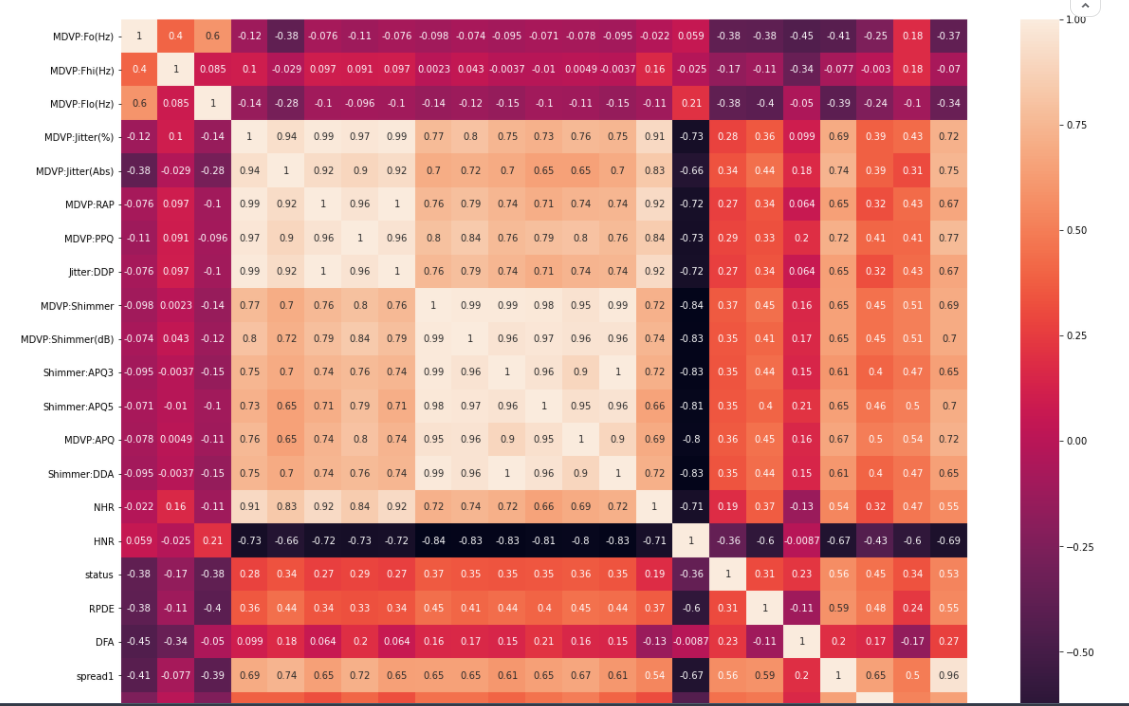

In [196]:
#train the model using the XGB classifier
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

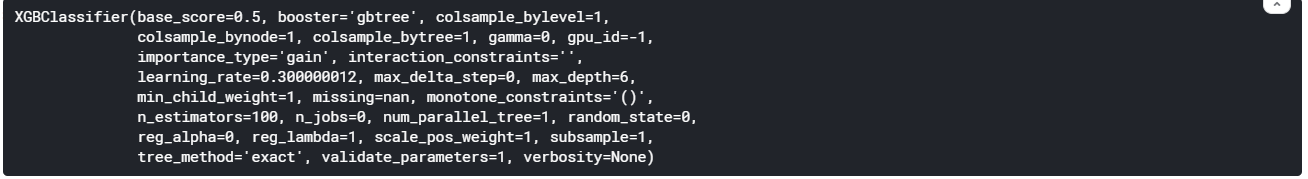

In [207]:
#Calculate the accuracy using accuracy learning
y_pred = model.predict(X_val)
print("XGBClassifer : ")
print(accuracy_score(y_val, y_pred) * 100)
print("")

XGBClassifer : 
94.87179487179486



Sequential

In [208]:
from tensorflow import keras
from tensorflow.keras import layers

In [209]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(16, activation= 'relu', kernel_initializer = 'random_normal', input_dim = 22))
layers.Dropout(0.3),
layers.BatchNormalization(),
#Second  Hidden Layer
classifier.add(Dense(8, activation= 'relu', kernel_initializer = 'random_normal'))
layers.Dropout(0.3),
layers.BatchNormalization(),
#Output Layer
classifier.add(Dense(1, activation= 'sigmoid', kernel_initializer = 'random_normal'))
#Compiling the neural network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fitting the data to the training dataset
classifier.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.7821
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.7564
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.7564
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.7756
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.8205
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.8333
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.8654
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8782
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8718
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8654
Epoch 11/50
16/16 [

In [206]:
tscores = classifier.evaluate(X_val, y_val)
print("Test Accuracy: %.2f%%" %(tscores[1]*100))

2/2 [==============================] - 0s 2ms/step - loss: 561.4968 - accuracy: 0.1795
Test Accuracy: 17.95%


Random Forest Classifier

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=6,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=7, splitter='best')
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
y_pred = rfcl.predict(X_val)
rfcl.score(X_val , y_val)

0.8205128205128205